<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python2/1_1_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the Keras Functional API

이 실습에서는 기능 구문을 사용하여 모델을 작성하는 방법을 시연합니다. 

Sequential API를 사용하여 하나를 구축하고 Functional API를 사용하여 동일한 작업을 수행할 수 있는 방법을 확인할 수 있습니다. 

둘 다 동일한 아키텍처에 도달하게 되며 평소와 같이 교육하고 평가할 수 있습니다.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

Sequential API

Sequential()

In [2]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

Functional API

functional syntax.

In [3]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

model 구축 및 그래프 시각화

아래에서 모델을 작성하는 방법을 선택할 수 있습니다. 

어떤 기능을 사용할지 설명만 해주시면 됩니다. 

줄거리가 똑같아 보인다는 것을 알게 될 거예요.

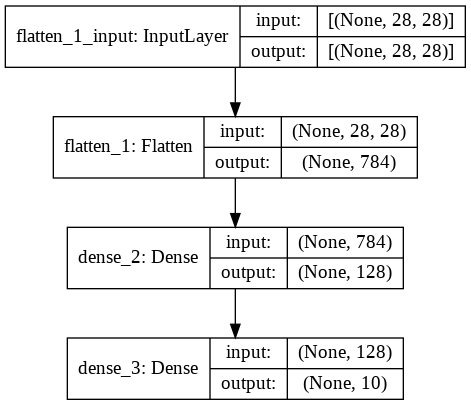

In [5]:
# model = build_model_with_functional()
model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

Training the model

Sequential API 또는 Functional API를 사용하여 구축한 경우에도 모델을 교육하고 평가할 때 동일한 단계를 수행합니다.

In [6]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6277 - accuracy: 0.7822
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3850 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8822
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8739


[0.3479827046394348, 0.8738999962806702]